In [34]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [35]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

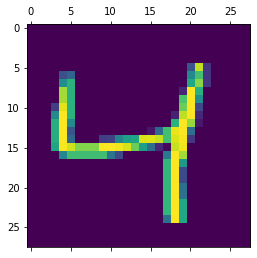

In [7]:
plt.matshow(X_train[2])

In [38]:
# Scaling the data
X_train = X_train/255
X_test = X_test/255

In [39]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [47]:
model = keras.Sequential([ # 100 neurons in hidden layer; it is trail and error
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='sigmoid') # last layer does not need the input shape; it can figure out
])

# we need to compile, optimizer makes it efficient to train, also determine the loss function
model.compile(
    optimizer='adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2724 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1228 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0862 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0660 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0511 - accuracy: 0.9844


In [48]:
# compile sigmoid before moving forward
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9729


[0.08291075378656387, 0.9728999733924866]

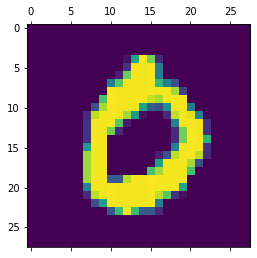

In [49]:
plt.matshow(X_test[3])

In [50]:
y_predicted = model.predict(X_test_flattened)
y_predicted[3]

313/313 [==============================] - 0s 975us/step


array([9.9992120e-01, 2.2572319e-03, 5.2897942e-01, 2.4550645e-02,
       1.1569457e-03, 3.4196455e-02, 8.0555052e-02, 8.0798976e-02,
       2.3401910e-04, 1.5857263e-02], dtype=float32)

In [51]:
np.argmax(y_predicted[3])

0

In [52]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [53]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    1,    2,    2,    3,    1,    5,    0],
       [   0, 1122,    3,    2,    0,    0,    1,    0,    7,    0],
       [   2,    2,  995,    7,    2,    0,    1,    4,   18,    1],
       [   0,    0,    4,  982,    0,   11,    0,    2,    8,    3],
       [   1,    0,    5,    0,  962,    0,    1,    0,    2,   11],
       [   2,    0,    0,    5,    1,  869,    2,    0,   11,    2],
       [   3,    3,    1,    1,    5,    8,  931,    0,    6,    0],
       [   0,    6,   12,    4,    2,    0,    0,  991,    6,    7],
       [   0,    0,    2,    6,    4,    1,    1,    2,  957,    1],
       [   2,    4,    0,    9,    9,    7,    0,    6,   16,  956]])>

Text(69.0, 0.5, 'Truth')

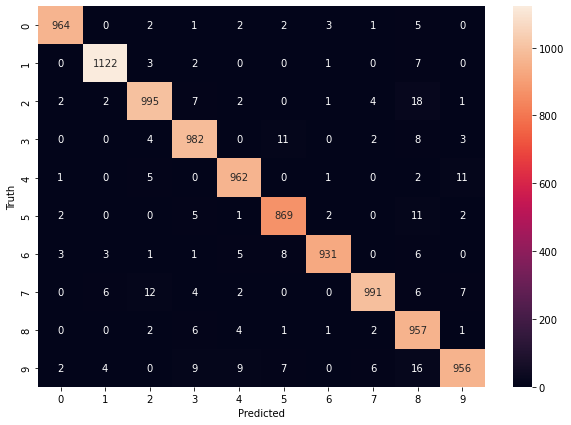

In [54]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
model = keras.Sequential([ # 100 neurons in hidden layer; it is trail and error
    keras.layers.Flatten(input_shape=(28,28)), # automatically flattens the data
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='sigmoid') # last layer does not need the input shape; it can figure out
])

# we need to compile, optimizer makes it efficient to train, also determine the loss function
model.compile(
    optimizer='adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2703 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1209 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0832 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0635 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0504 - accuracy: 0.9848


In [71]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0781 - accuracy: 0.9751


[0.07806651294231415, 0.9750999808311462]

In [72]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 0s 943us/step


In [76]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [77]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    2,    0,    0,    0,    1,    3,    3,    0],
       [   0, 1125,    2,    1,    0,    0,    1,    0,    6,    0],
       [   6,    3, 1005,    1,    4,    0,    2,    6,    4,    1],
       [   0,    0,    4,  992,    0,    1,    0,    6,    5,    2],
       [   2,    0,    2,    1,  945,    0,    3,    3,    4,   22],
       [   2,    1,    0,   17,    1,  855,    3,    2,    7,    4],
       [   6,    3,    1,    1,    4,    7,  931,    1,    4,    0],
       [   0,    5,   10,    3,    0,    0,    0, 1003,    1,    6],
       [   5,    0,    3,    5,    4,    2,    2,    4,  944,    5],
       [   4,    3,    0,    7,    5,    1,    0,    7,    2,  980]])>

Text(69.0, 0.5, 'Truth')

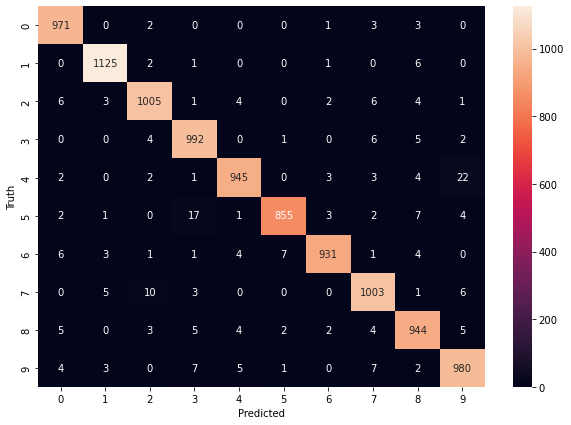

In [78]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# practice: try different activation functions, optimizers and different lost functions; TF loss functions; and try different datasets